# ***Pre-Process Example***

This notebook shows example of the preprocess.

### ***Import packages***

In [8]:
import os
import numpy as np
from matplotlib import pyplot as plt
from pyimzml.ImzMLParser import ImzMLParser, getionimage

### ***Define variables***

Define constant variables:

In [9]:
# define the lowest mz value in spectrum
MZ_START = 49

# define the largest mz value in spectrum
MZ_END = 1201

# define the spectrum mass resultion
MASS_RESOLUTION = 0.025

# create spectrum bins using spectrum lowest and largest
# mz value and spectrum mass resultion
BINS = np.around(np.arange(MZ_START, MZ_END, MASS_RESOLUTION/2), 5)

Define non constant but global variables:

In [36]:
# path to imzML-DESI file
imzml_file = '/sise/assafzar-group/assafzar/Leor/imzml-DESI/HG 9-10-r.imzML'

### ***Show changes in single spectrum:***

In [40]:
""" This module contain all utils for mass spectrum """

import numpy as np
import pandas as pd
from typing import Tuple


class SpectrumUtils():
  """
  Class that contain all utils for mass spectrum
  """
  def __init__(self) -> None:
    pass

  @classmethod
  def normalize_spectrum(
      cls, spectrum: Tuple[np.ndarray, np.ndarray]
      ) -> Tuple[np.ndarray, np.ndarray]:    
    """
    Method to normalize spectrum intensity by total ion count (TIC).

    Args:
      spectrum (Tuple[np.ndarray, np.ndarray]): first element is mz values
      array of spectrum and second element is the intensity values array
      of spectrum.

    Returns:
      Tuple[np.ndarray, np.ndarray]: first element is mz values array of
      spectrum and second element is normalized intensity values array
      of spectrum.
    """
    # unpack spectrum
    mzs, intensities = spectrum
    # get TIC - total ion count
    intensities_sum = intensities.sum() * (2/3)
    # if TIC is zero no need to divide by TIC
    if  intensities_sum == 0:
      return (mzs, intensities)
    return  (mzs, intensities / intensities_sum)

  @classmethod
  def bining_spectrum(
      cls, spectrum: Tuple[np.ndarray, np.ndarray],
      bins:np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Method to bin spectrum intensity into predefined bins

    Args:
      spectrum (Tuple[np.ndarray, np.ndarray]): first element is mz values
      array of spectrum and second element is the intensity values array
      of spectrum.
      bins (np.ndarray): predefined mz values bins array.

    Returns:
      Tuple[np.ndarray, np.ndarray]: first element is the predefined mz values
      bins and second element is bin average intensity values array of spectrum.
    """
    # unpack spectrum
    mzs, intensities = spectrum

    # create new empty intensities array
    # corresponding to bins
    new_intensities = np.zeros(bins.shape)

    # assign each mz value to its corresponding bin index
    mz_bin_index = np.digitize(mzs, bins, right=True)

    # create dataframe with the following columns -
    # mz value bin index, mz value, intensity
    df = pd.DataFrame({'mz_bin_index': np.asarray(mz_bin_index),
              'mz': np.asarray(mzs), 'intensity': np.asarray(intensities)})

    # group by the bins index, get the intensity 
    # as sum of bin intensities
    df_group = df.groupby(by='mz_bin_index').agg(
        {'mz_bin_index': 'first', 'intensity': 'sum'})

    # for all bins indexes that are in the mz_bin_index
    # assign the corresponding intensity value
    # leaving all other bins zero
    new_intensities[df_group['mz_bin_index']] = df_group['intensity']

    return (bins.copy(), new_intensities)


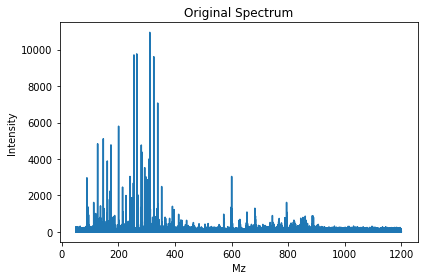

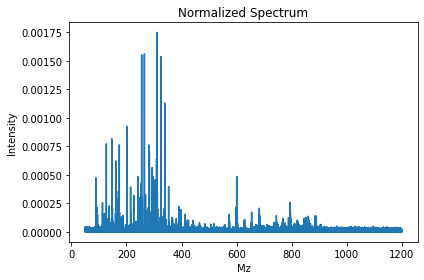

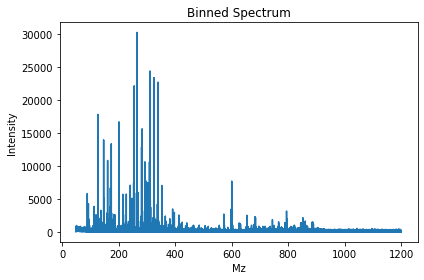

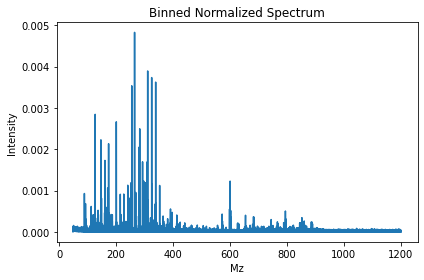

In [41]:
# parse imzML file
p = ImzMLParser(imzml_file)

# get index 0 spectrum
original_mzs, original_intensities = p.getspectrum(8000)

# normalize spectrum
normalized_mzs, normalize_intensities = SpectrumUtils().normalize_spectrum(
    (original_mzs, original_intensities))

#  bin spectrum
binned_mzs, binned_intensities = SpectrumUtils().bining_spectrum(
    (original_mzs, original_intensities), BINS)

# normalize and bin spectrum
binned_normalized_mzs, binned_normalized_intensities = (
    SpectrumUtils().bining_spectrum(
        SpectrumUtils().normalize_spectrum(
            (original_mzs, original_intensities)), BINS))

# left top subplot
plt.plot(original_mzs, original_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Original Spectrum')
plt.tight_layout()
plt.show()

# right top subplot
plt.plot(normalized_mzs, normalize_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Normalized Spectrum')
plt.tight_layout()
plt.show()

# left bottom subplot
plt.plot(binned_mzs, binned_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Binned Spectrum')
plt.tight_layout()
plt.show()

# right bottom subplot
plt.plot(binned_normalized_mzs, binned_normalized_intensities)
plt.xlabel('Mz')
plt.ylabel('Intensity')
plt.title('Binned Normalized Spectrum')
plt.tight_layout()
plt.show()

In [32]:
p.coordinates[-1]

(246, 57, 1)